In [58]:
%matplotlib inline

import numpy as np
import os
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import SVG
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Flatten, Dropout
from keras.utils import np_utils
#from keras.utils.vis_utils import model_to_dot
from tensorflow.python.keras.utils.vis_utils import model_to_dot
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
from sklearn.model_selection import train_test_split

In [59]:
# load data set 
data = np.load('X.npy') 
target = np.load('Y.npy') 

In [60]:
data.shape

(2062, 64, 64)

In [61]:
data = data.reshape(2062, 64, 64, 1)

In [62]:
target.shape

(2062, 10)

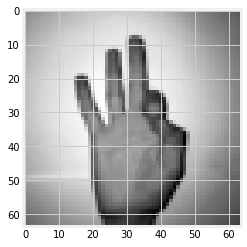

In [63]:
img_size = 64
plt.imshow(data[1].reshape(64, 64))

In [44]:
Y = np.zeros(data.shape[0]) 
Y[:204] = 9 
Y[204:409] = 0
Y[409:615] = 7 
Y[615:822] = 6 
Y[822:1028] = 1 
Y[1028:1236] = 8 
Y[1236:1443] = 4 
Y[1443:1649] = 3 
Y[1649:1855] = 2 
Y[1855:] = 5 

In [45]:
Y.shape

(2062,)

In [46]:
X_train, X_test, y_train, y_test = train_test_split(data, Y, test_size = 0.2, random_state = 2)

In [47]:
X_train.shape

(1649, 64, 64, 1)

In [48]:
X_test.shape

(413, 64, 64, 1)

In [49]:
y_train.shape

(1649,)

In [50]:
y_test.shape

(413,)

In [51]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [52]:
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

1649 train samples
413 test samples


In [53]:
n_classes = 10

y_train = np_utils.to_categorical(y_train, n_classes)
y_test = np_utils.to_categorical(y_test, n_classes)

/Users/mikio/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


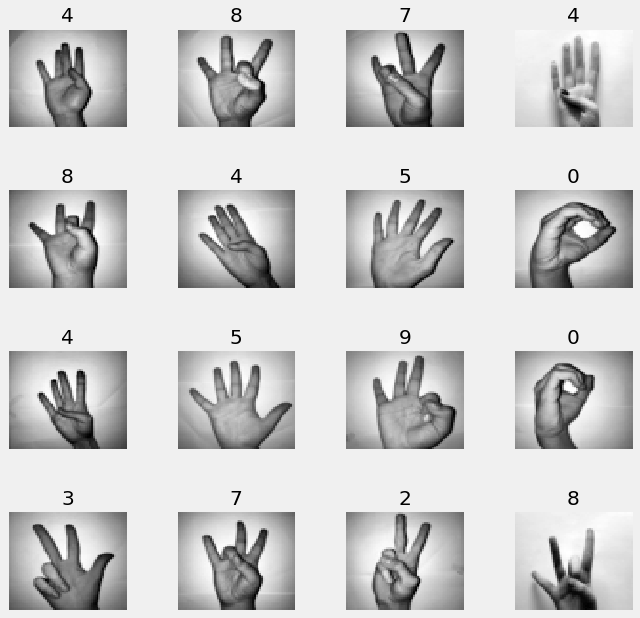

In [54]:
def draw_digit3(data, n, numbers_size, label, title=None):
    plt.subplot(numbers_size, numbers_size, n)
    Z = data.reshape(img_size, img_size)
    Z = Z[::-1,:]
    plt.xlim(0, img_size-1)
    plt.ylim(0, img_size-1)
    plt.pcolor(Z)
    
    plt.subplots_adjust(wspace=0.4, hspace=0.6)

    plt.gray()
    plt.title(np.argmax(label))
    plt.tick_params(labelbottom='off')
    plt.tick_params(labelleft='off')
    
plt.style.use('fivethirtyeight')
numbers_size = 4
plt.figure(figsize=(10, 10))
for cnt, idx in enumerate(np.random.permutation(len(X_train))[:numbers_size**2]):
    draw_digit3(X_train[idx], cnt+1, numbers_size, y_train[idx])

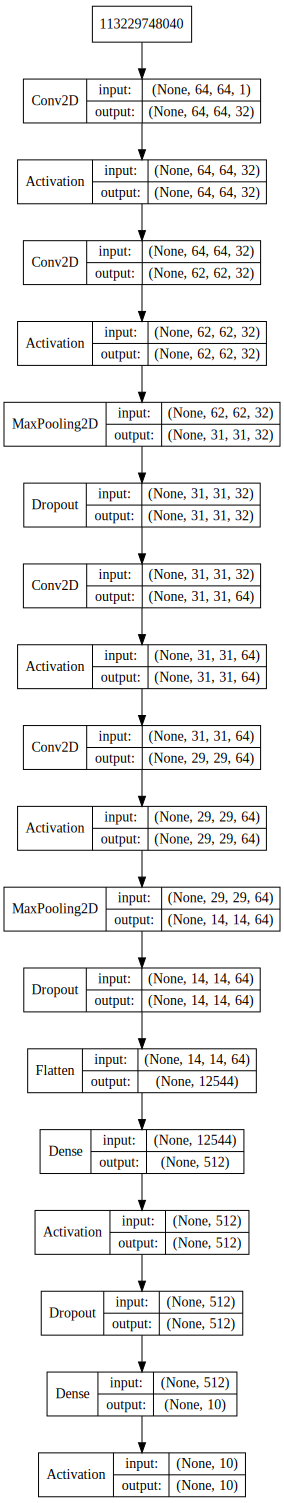

In [55]:
n_epoch = 10
b_size = 30

model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same',input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
 
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))

SVG(model_to_dot(model, show_shapes=True, show_layer_names=False).create(prog='dot', format='svg'))

In [56]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#model.fit(X_train, y_train, batch_size=b_size, epochs=n_epoch, verbose=1, validation_data=(X_test,y_test))
#score = model.evaluate(X_test, y_test, verbose=0)
y_train.shape

(1649, 10)

In [57]:
model.fit(X_train, y_train, batch_size=b_size, epochs=n_epoch, verbose=1, validation_data=(X_test, y_test))

Train on 1649 samples, validate on 413 samples
Epoch 1/10
1649/1649 [==============================] - 31s 19ms/step - loss: 2.2241 - acc: 0.1753 - val_loss: 1.2765 - val_acc: 0.6877
Epoch 2/10
1649/1649 [==============================] - 34s 20ms/step - loss: 1.1510 - acc: 0.6204 - val_loss: 0.7056 - val_acc: 0.7966
Epoch 3/10
1649/1649 [==============================] - 36s 22ms/step - loss: 0.7275 - acc: 0.7605 - val_loss: 0.5582 - val_acc: 0.8402
Epoch 4/10
1649/1649 [==============================] - 34s 21ms/step - loss: 0.5098 - acc: 0.8266 - val_loss: 0.4709 - val_acc: 0.8644
Epoch 5/10
1649/1649 [==============================] - 36s 22ms/step - loss: 0.3534 - acc: 0.8811 - val_loss: 0.4012 - val_acc: 0.9031
Epoch 6/10
1649/1649 [==============================] - 34s 21ms/step - loss: 0.2511 - acc: 0.9012 - val_loss: 0.4001 - val_acc: 0.8959
Epoch 7/10
1649/1649 [==============================] - 30s 18ms/step - loss: 0.2290 - acc: 0.9278 - val_loss: 0.4129 - val_acc: 0.8959
E

In [64]:
score = model.evaluate(X_test, y_test, verbose=1)

413/413 [==============================] - 2s 5ms/step


In [65]:
score

[0.3065108387724251, 0.9370460051312574]

In [66]:
def draw_digit4(data, n, numbers_size, label, title=None):
    plt.subplot(numbers_size, numbers_size, n)
    Z = data.reshape(img_size, img_size)
    Z = Z[::-1,:]
    plt.xlim(0, img_size-1)
    plt.ylim(0, img_size-1)
    plt.pcolor(Z)
    
    plt.subplots_adjust(wspace=0.4, hspace=0.6)

    plt.gray()
    plt.title(label)
    plt.tick_params(labelbottom='off')
    plt.tick_params(labelleft='off')

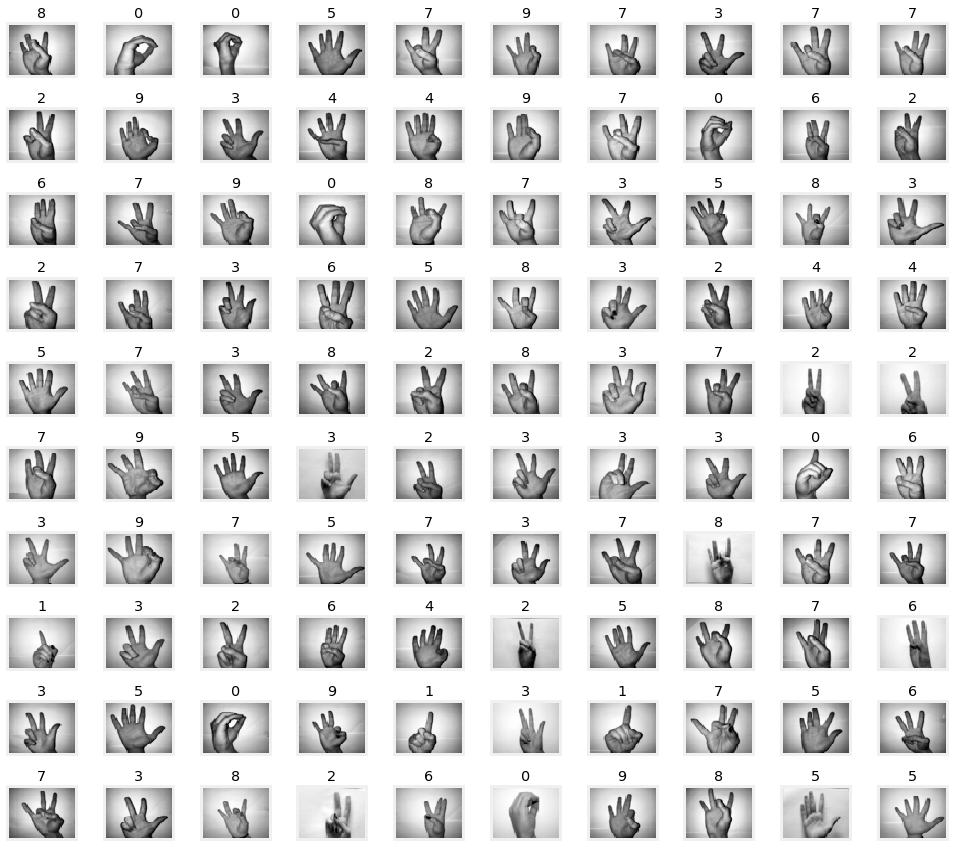

In [67]:
numbers_size = 10
plt.figure(figsize=(15, 15))
for cnt, idx in enumerate(np.random.permutation(len(X_test))[:numbers_size**2]):
    y = model.predict(X_test[int(idx):int(idx)+1], batch_size=1, verbose=0)
    #print(np.argmax(y))
    draw_digit4(X_test[idx], cnt+1, numbers_size, np.argmax(y))

In [186]:
#エポック数の変化による学習結果（1〜19)
b_size = 30
score_list = []
for n_epoch in range(1, 20):
    model.fit(X_train, y_train, batch_size=b_size, epochs=n_epoch, verbose=1, validation_data=(X_test, y_test))
    score = model.evaluate(X_test, y_test, verbose=0)
    score_list.append(score[1])

Train on 1649 samples, validate on 413 samples
Epoch 1/1
1649/1649 [==============================] - 16s 10ms/step - loss: 0.1820 - acc: 0.9381 - val_loss: 0.3959 - val_acc: 0.8814
Train on 1649 samples, validate on 413 samples
Epoch 1/2
1649/1649 [==============================] - 19s 12ms/step - loss: 0.2947 - acc: 0.8987 - val_loss: 0.4810 - val_acc: 0.8499
Epoch 2/2
1649/1649 [==============================] - 19s 11ms/step - loss: 0.2159 - acc: 0.9297 - val_loss: 0.3039 - val_acc: 0.9153
Train on 1649 samples, validate on 413 samples
Epoch 1/3
1649/1649 [==============================] - 19s 11ms/step - loss: 0.1745 - acc: 0.9388 - val_loss: 0.3516 - val_acc: 0.9007
Epoch 2/3
1649/1649 [==============================] - 18s 11ms/step - loss: 0.1751 - acc: 0.9375 - val_loss: 0.3470 - val_acc: 0.9056
Epoch 3/3
1649/1649 [==============================] - 22s 13ms/step - loss: 0.1839 - acc: 0.9357 - val_loss: 0.3247 - val_acc: 0.9128
Train on 1649 samples, validate on 413 samples
Ep

Epoch 3/11
1649/1649 [==============================] - 21s 13ms/step - loss: 0.1019 - acc: 0.9600 - val_loss: 0.2885 - val_acc: 0.9177
Epoch 4/11
1649/1649 [==============================] - 19s 11ms/step - loss: 0.0649 - acc: 0.9812 - val_loss: 0.3421 - val_acc: 0.9153
Epoch 5/11
1649/1649 [==============================] - 19s 11ms/step - loss: 0.0889 - acc: 0.9709 - val_loss: 0.2680 - val_acc: 0.9298
Epoch 6/11
1649/1649 [==============================] - 17s 10ms/step - loss: 0.0741 - acc: 0.9739 - val_loss: 0.2643 - val_acc: 0.9395
Epoch 7/11
1649/1649 [==============================] - 19s 12ms/step - loss: 0.0891 - acc: 0.9648 - val_loss: 0.2953 - val_acc: 0.9443
Epoch 8/11
1649/1649 [==============================] - 16s 10ms/step - loss: 0.0690 - acc: 0.9788 - val_loss: 0.2795 - val_acc: 0.9322
Epoch 9/11
1649/1649 [==============================] - 18s 11ms/step - loss: 0.0647 - acc: 0.9757 - val_loss: 0.3322 - val_acc: 0.9177
Epoch 10/11
1649/1649 [=========================

Epoch 12/15
1649/1649 [==============================] - 15s 9ms/step - loss: 0.0625 - acc: 0.9830 - val_loss: 0.3428 - val_acc: 0.9007
Epoch 13/15
1649/1649 [==============================] - 15s 9ms/step - loss: 0.0353 - acc: 0.9897 - val_loss: 0.2635 - val_acc: 0.9249
Epoch 14/15
1649/1649 [==============================] - 17s 10ms/step - loss: 0.0347 - acc: 0.9891 - val_loss: 0.2522 - val_acc: 0.9370
Epoch 15/15
1649/1649 [==============================] - 16s 10ms/step - loss: 0.0395 - acc: 0.9867 - val_loss: 0.3079 - val_acc: 0.9322
Train on 1649 samples, validate on 413 samples
Epoch 1/16
1649/1649 [==============================] - 17s 10ms/step - loss: 0.0639 - acc: 0.9800 - val_loss: 0.3279 - val_acc: 0.9201
Epoch 2/16
1649/1649 [==============================] - 16s 10ms/step - loss: 0.0709 - acc: 0.9788 - val_loss: 0.3146 - val_acc: 0.9249
Epoch 3/16
1649/1649 [==============================] - 17s 10ms/step - loss: 0.0479 - acc: 0.9836 - val_loss: 0.2739 - val_acc: 0.9298

Epoch 5/19
1649/1649 [==============================] - 16s 10ms/step - loss: 0.0478 - acc: 0.9861 - val_loss: 0.2943 - val_acc: 0.9370
Epoch 6/19
1649/1649 [==============================] - 17s 10ms/step - loss: 0.0418 - acc: 0.9873 - val_loss: 0.2825 - val_acc: 0.9395
Epoch 7/19
1649/1649 [==============================] - 16s 10ms/step - loss: 0.0376 - acc: 0.9879 - val_loss: 0.3252 - val_acc: 0.9322
Epoch 8/19
1649/1649 [==============================] - 17s 10ms/step - loss: 0.0412 - acc: 0.9848 - val_loss: 0.3538 - val_acc: 0.9056
Epoch 9/19
1649/1649 [==============================] - 17s 10ms/step - loss: 0.0381 - acc: 0.9879 - val_loss: 0.3099 - val_acc: 0.9153
Epoch 10/19
1649/1649 [==============================] - 17s 10ms/step - loss: 0.0431 - acc: 0.9848 - val_loss: 0.2801 - val_acc: 0.9249
Epoch 11/19
1649/1649 [==============================] - 16s 10ms/step - loss: 0.0320 - acc: 0.9903 - val_loss: 0.3156 - val_acc: 0.9249
Epoch 12/19
1649/1649 [=======================

In [187]:
score_list

[0.8813559311931416,
 0.9152542391643108,
 0.9128329300707246,
 0.8861985462052482,
 0.9128329300707246,
 0.9055690062536743,
 0.9225181613938284,
 0.9273607751070443,
 0.9297820839119881,
 0.9225181585074048,
 0.924939467600991,
 0.9152542375767779,
 0.9370460064301479,
 0.9225181598062954,
 0.9322033898305084,
 0.9176755463817218,
 0.9346246960376712,
 0.9200968538877751,
 0.9297820810255646]

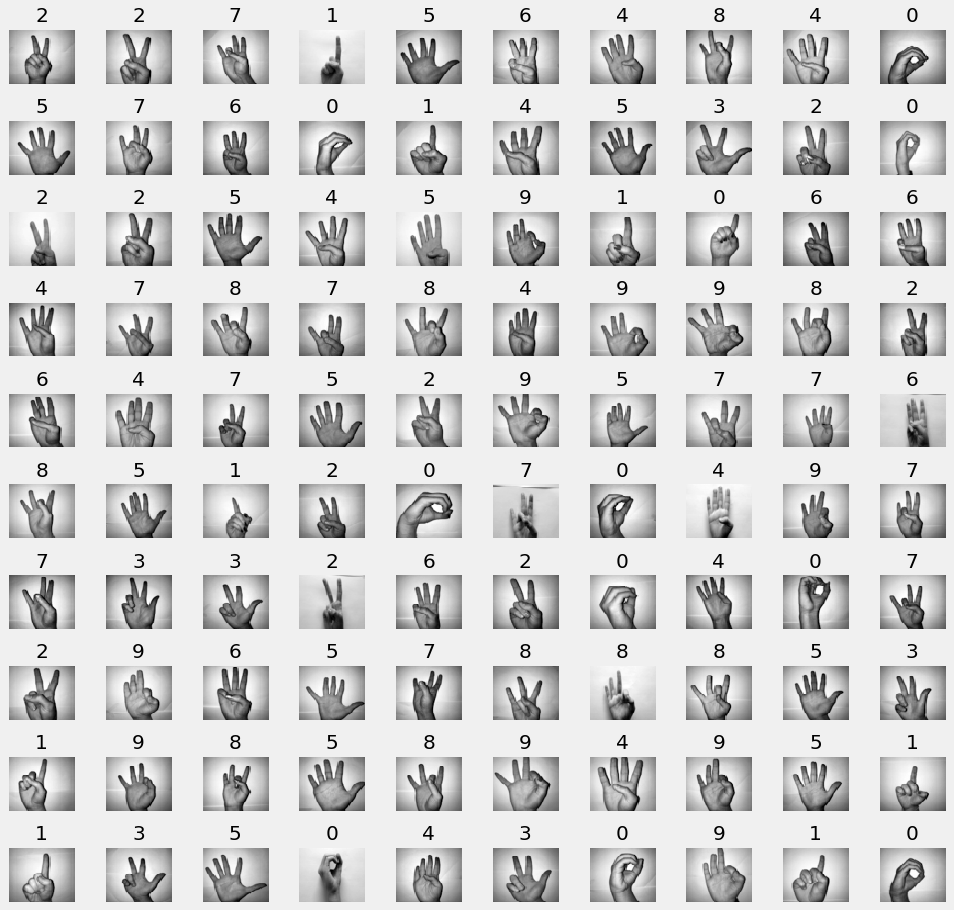

In [188]:
numbers_size = 10
plt.figure(figsize=(15, 15))
for cnt, idx in enumerate(np.random.permutation(len(X_test))[:numbers_size**2]):
    y = model.predict(X_test[int(idx):int(idx)+1], batch_size=1, verbose=0)
    #print(np.argmax(y))
    draw_digit4(X_test[idx], cnt+1, numbers_size, np.argmax(y))

In [191]:
index_score = list(range(1,20))
index_score

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

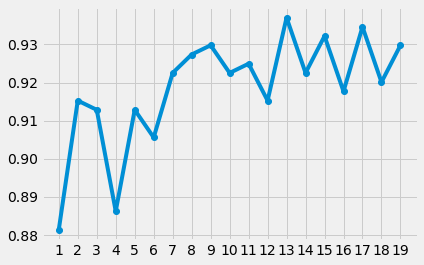

In [203]:
fig = plt.figure()
ax = fig.add_subplot(111)

plt.plot(index_score,score_list, marker="o")
ax.set_xticks(index_score)
plt.savefig('CNN_acc.png')